In [8]:
import struct
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import decomposition

In [11]:
import struct
with open('../dataset/MNIST/train-labels-idx1-ubyte', 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    y_train = np.fromfile(lbpath, dtype=np.uint8)
with open('../dataset/MNIST/train-images-idx3-ubyte', 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    X_train = np.fromfile(imgpath,dtype=np.uint8).reshape(len(y_train), -1)
with open('../dataset/MNIST/t10k-labels-idx1-ubyte', 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    y_test = np.fromfile(lbpath, dtype=np.uint8)
with open('../dataset/MNIST/t10k-images-idx3-ubyte', 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    X_test = np.fromfile(imgpath,dtype=np.uint8).reshape(len(y_test), -1)

In [12]:
sub_sample = 5000
y = y_train[:sub_sample]
X = X_train[:sub_sample]

n_samples, n_features = X.shape
n_neighbors = 30

In [14]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X_emb, title=None):
    x_min, x_max = np.min(X_emb, 0), np.max(X_emb, 0)
    X_emb = (X_emb - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X_emb.shape[0]):
        plt.text(X_emb[i, 0], X_emb[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(sub_sample):
            dist = np.sum((X_emb[i] - shown_images) ** 2, 1)
            if np.min(dist) < 8e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X_emb[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28,28)[::2,::2], cmap=plt.cm.gray_r),
                X_emb[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

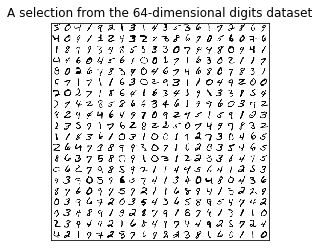

In [15]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((30 * n_img_per_row, 30 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 30 * i + 1
    for j in range(n_img_per_row):
        iy = 30 * j + 1
        img[ix:ix + 28, iy:iy + 28] = X[i * n_img_per_row + j].reshape((28, 28))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [16]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=50).fit_transform(X)
tsne  = manifold.TSNE()
X_tsne = tsne.fit_transform(X_pca)

Computing t-SNE embedding


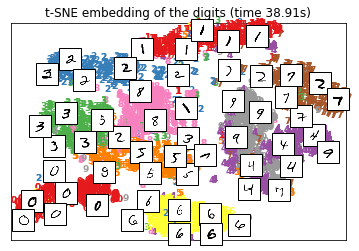

In [17]:
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

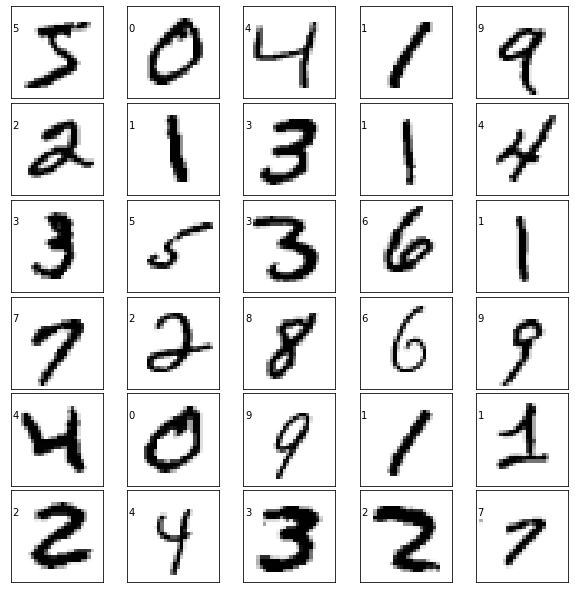

In [6]:
fig=plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(30):
    img = train_x[i][0]
    ax=fig.add_subplot(6,5,i+1,xticks=[],yticks=[])
    ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(train_y[i]))
plt.show()